In [1]:
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
summary_matrix = np.genfromtxt('causal_graphs/latest_sp500_return_summary_matrix_varlingam_lag_1.csv', delimiter=',', dtype=None, encoding=None)
G = nx.from_numpy_array(summary_matrix.T, create_using=nx.DiGraph)
tickers = pd.read_csv('data/Cleaned_SP500_Data_latest.csv', delimiter=',', nrows=1).columns.to_list()
mapping = {i: tickers[i] for i in G.nodes()}
G = nx.relabel_nodes(G, mapping)
print(G)

DiGraph with 465 nodes and 10048 edges


In [3]:
percentile_95 = np.percentile(summary_matrix, 95)
percentile_99 = np.percentile(summary_matrix, 99)
percentile_999 = np.percentile(summary_matrix, 99.9)

In [4]:
G_95 = G.copy()
for u, v, data in list(G_95.edges(data=True)):
    if data.get('weight', 0) < percentile_95:
        G_95.remove_edge(u, v)
print(G_95)

DiGraph with 465 nodes and 10048 edges


In [5]:
G_99 = G.copy()
for u, v, data in list(G_99.edges(data=True)):
    if data.get('weight', 0) < percentile_99:
        G_99.remove_edge(u, v)
print(G_99)

DiGraph with 465 nodes and 2163 edges


In [6]:
G_999 = G.copy()
for u, v, data in list(G_999.edges(data=True)):
    if data.get('weight', 0) < percentile_999:
        G_999.remove_edge(u, v)
print(G_999)

DiGraph with 465 nodes and 217 edges


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

DiGraph with 465 nodes and 10048 edges


/Users/tangruijie/anaconda3/envs/l/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


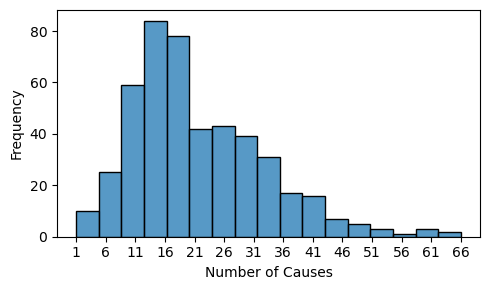

In [8]:
cause_counts = {}
causal_graph = G_95.copy()
print(causal_graph)
for node in causal_graph.nodes():
    cause_counts[node] = causal_graph.in_degree(node)
cause_counts_list = list(cause_counts.values())

plt.figure(figsize=(5, 3))
sns.histplot(cause_counts_list, kde=False)
plt.xticks(np.arange(min(cause_counts_list), max(cause_counts_list) + 1, 5))
# plt.title('Distribution of Cause Counts: 95')
plt.xlabel('Number of Causes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./plots/sp500_cause_distribution_varlingam_lag_1_95_percentile.pdf')

DiGraph with 465 nodes and 2163 edges


/Users/tangruijie/anaconda3/envs/l/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


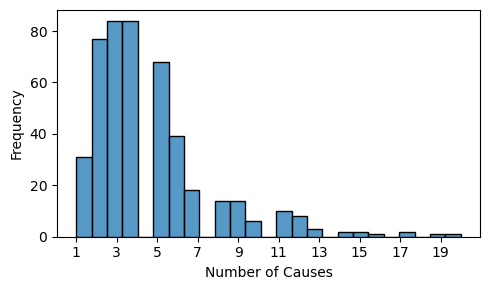

In [9]:
cause_counts = {}
causal_graph = G_99.copy()
print(causal_graph)
for node in causal_graph.nodes():
    cause_counts[node] = causal_graph.in_degree(node)
cause_counts_list = list(cause_counts.values())

plt.figure(figsize=(5, 3))
sns.histplot(cause_counts_list, kde=False)
plt.xticks(np.arange(min(cause_counts_list), max(cause_counts_list) + 1, 2))
# plt.title('Distribution of Cause Counts: 99')
plt.xlabel('Number of Causes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./plots/sp500_cause_distribution_varlingam_lag_1_99_percentile.pdf')

DiGraph with 465 nodes and 217 edges


/Users/tangruijie/anaconda3/envs/l/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


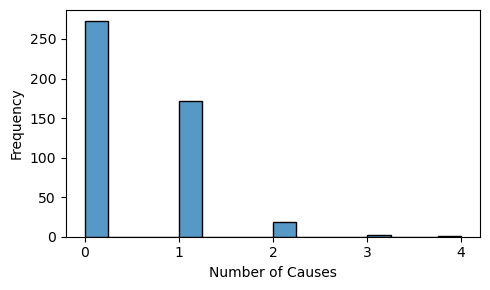

In [10]:
cause_counts = {}
causal_graph = G_999.copy()
print(causal_graph)
for node in causal_graph.nodes():
    cause_counts[node] = causal_graph.in_degree(node)
cause_counts_list = list(cause_counts.values())

plt.figure(figsize=(5, 3))
sns.histplot(cause_counts_list, kde=False)
plt.xticks(np.arange(min(cause_counts_list), max(cause_counts_list) + 1, 1))
# plt.title('Distribution of Cause Counts: 99.9')
plt.xlabel('Number of Causes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./plots/sp500_cause_distribution_varlingam_lag_1_999_percentile.pdf')

DiGraph with 465 nodes and 10048 edges


/Users/tangruijie/anaconda3/envs/l/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


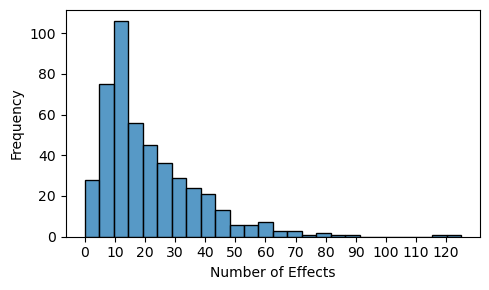

In [11]:
effect_counts = {}
causal_graph = G_95.copy()
print(causal_graph)
for node in causal_graph.nodes():
    effect_counts[node] = causal_graph.out_degree(node)
effect_counts_list = list(effect_counts.values())

plt.figure(figsize=(5, 3))
sns.histplot(effect_counts_list, kde=False)
plt.xticks(np.arange(min(effect_counts_list), max(effect_counts_list) + 1, 10))
# plt.title('Distribution of Effect Counts: 95')
plt.xlabel('Number of Effects')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./plots/sp500_effect_distribution_varlingam_lag_1_95_percentile.pdf')

DiGraph with 465 nodes and 2163 edges


/Users/tangruijie/anaconda3/envs/l/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


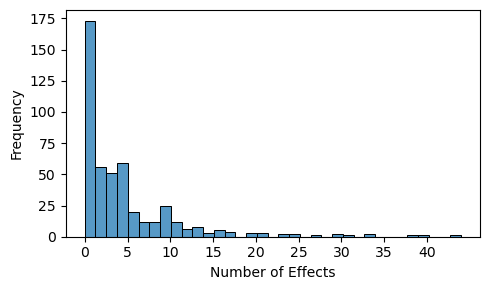

In [12]:
effect_counts = {}
causal_graph = G_99.copy()
print(causal_graph)
for node in causal_graph.nodes():
    effect_counts[node] = causal_graph.out_degree(node)
effect_counts_list = list(effect_counts.values())

plt.figure(figsize=(5, 3))
sns.histplot(effect_counts_list, kde=False)
plt.xticks(np.arange(min(effect_counts_list), max(effect_counts_list) + 1, 5))
# plt.title('Distribution of Effect Counts: 99')
plt.xlabel('Number of Effects')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./plots/sp500_effect_distribution_varlingam_lag_1_99_percentile.pdf')

DiGraph with 465 nodes and 217 edges


/Users/tangruijie/anaconda3/envs/l/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


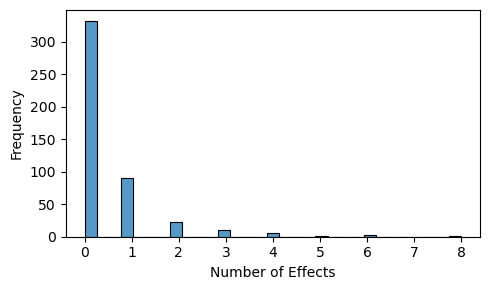

In [13]:
effect_counts = {}
causal_graph = G_999.copy()
print(causal_graph)
for node in causal_graph.nodes():
    effect_counts[node] = causal_graph.out_degree(node)
effect_counts_list = list(effect_counts.values())

plt.figure(figsize=(5, 3))
sns.histplot(effect_counts_list, kde=False)
plt.xticks(np.arange(min(effect_counts_list), max(effect_counts_list) + 1, 1))
# plt.title('Distribution of Effect Counts: 99.9')
plt.xlabel('Number of Effects')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./plots/sp500_effect_distribution_varlingam_lag_1_999_percentile.pdf')